In [1]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v3
from draw import draw  #绘图函数

# 针对第4章的 value iteration代码进行 stochastic（随机）
# 这个代码的目标是去得到一个基线

In [2]:

rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3.GridWorld_v3(forbiddenAreaScore=-1, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [3]:
# 策略评估过程，用于计算在给定策略下每个状态的价值
# policy evaluation

# 初始化策略，每个状态在 5 个动作上的概率均为 0.2
policy = 0.2 * np.ones((rows*columns,5))
# 折扣因子，用于控制未来奖励的重要性
gamma = 0.99

# 初始化状态价值函数，所有状态的价值初始为 0
value = np.zeros(rows*columns)
# 复制初始价值函数，并加 1 以确保进入迭代循环
value0 = value.copy()+1

# 迭代更新状态价值函数，直到价值函数收敛（两次迭代的价值差的平方和小于 0.0001）
while(np.sum((value0-value)**2)>0.0001):
    # 保存上一次迭代的状态价值函数
    value0 = value.copy()
    # 遍历所有状态，使用当前策略 policy 计算每个状态的价值
    for i in range(rows * columns):   
        # 重置当前状态的价值
        value[i] = 0

        # 特殊处理状态 17，这是一个关键状态
        if i == 17:
            # 应用贝尔曼迭代公式更新状态 17 的价值
            value[i] = 1 + value0[17] * gamma 
            # 跳过后续的动作遍历，继续下一个状态的计算
            continue
        
        # value[17] = 0.28
        
        # 遍历当前状态的所有 5 个动作
        for j in range(0,5):
            # 调用 gridworld 类的方法，获取执行动作 j 后的得分和下一个状态的 ID
            score, nextState = gridworld.getScore(i,j)   
            # 应用贝尔曼迭代公式更新当前状态的价值
            value[i] += 0.2 * (score + value0[nextState] * gamma)


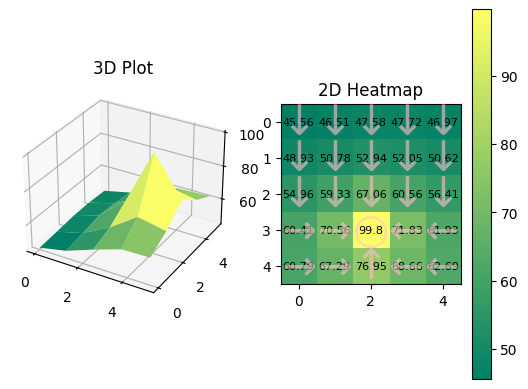

In [4]:
# 初始化动作价值数组，形状为 (rows*columns, 5)，初始值全为 1
action_values = np.ones((rows*columns,5))
# 遍历所有状态，这里假设总共有 25 个状态
for i in range(25):
    # 遍历每个状态下的 5 个动作
    for j in range(5):
        # 调用 gridworld 对象的 getScore 方法，获取当前状态-动作对的得分和下一个状态
        score, nextState = gridworld.getScore(i,j)
        # 根据贝尔曼方程更新动作价值数组中对应位置的值
        action_values[i][j] = score + gamma * value[nextState]
# 找出每个状态下动作价值最大的动作索引
p = np.argmax(action_values,axis=1)
# 调用 draw 函数，传入重塑后的价值函数和最优动作索引，绘制结果
draw(value.reshape(5,5), p) #得到所有概率都是0.2的策略，贝尔曼方程的解